# TensorFlow Tutorial using Street Signs


By: Becca Araya

In [58]:
%matplotlib inline
import skimage.io
import tensorflow as tf
from skimage import transform
from skimage import data
import matplotlib.pyplot as plt
import os
import numpy as np
from skimage.color import rgb2gray
import random

In [59]:
# Initialize two constants
x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,8])

# Multiply
result = tf.multiply(x1, x2)

# Print the result
print(result)

Tensor("Mul_6:0", shape=(4,), dtype=int32)


In [60]:
# Initialize two constants
x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,8])

# Multiply
result = tf.multiply(x1, x2)

# Intialize the Session
sess = tf.Session()

# Print the result
print(sess.run(result))

# Close the session
sess.close()

[ 5 12 21 32]


In [61]:
# Initialize two constants
x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,8])

# Multiply
result = tf.multiply(x1, x2)

# Initialize Session and run `result`
with tf.Session() as sess:
    output = sess.run(result)
    print(output)

[ 5 12 21 32]


In [62]:
def load_data(data_dir):
    # Get all subdirectories of data_dir. Each represents a label.
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]
    # Loop through the label directories and collect the data in
    # two lists, labels and images.
    labels = []
    images = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(data.imread(f))
            labels.append(int(d))
    return images, labels

ROOT_PATH = "/Users/beccaaraya/Downloads/"
train_data_dir = os.path.join(ROOT_PATH, "TrafficSigns/Training")
test_data_dir = os.path.join(ROOT_PATH, "TrafficSigns/Testing")

images, labels = load_data(train_data_dir)

In [63]:
images_array = np.array(images)
labels_array = np.array(labels)

# Print the `images` dimensions
print(images_array.ndim)

# Print the number of `images`'s elements
print(images_array.size)

# Print the first instance of `images`
images_array[0]

# Print the `labels` dimensions
print(labels_array.ndim)

# Print the number of `labels`'s elements
print(labels_array.size)

# Count the number of labels
print(len(set(labels_array)))

1
4575
1
4575
62


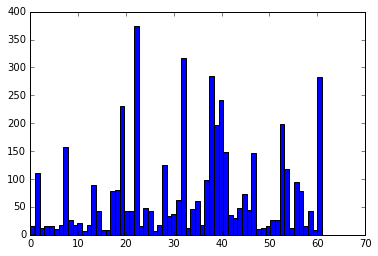

In [64]:
# Make a histogram with 62 bins of the `labels` data
plt.hist(labels, 62)

# Show the plot
plt.show()

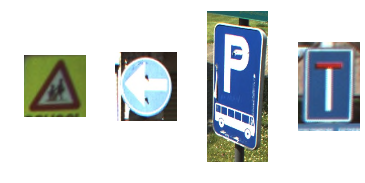

In [65]:
# Determine the (random) indexes of the images that you want to see 
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images that you defined 
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)

plt.show()

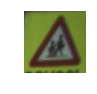

shape: (62, 61, 3), min: 3, max: 160


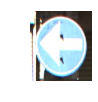

shape: (110, 96, 3), min: 3, max: 255


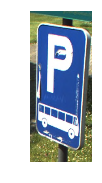

shape: (379, 153, 3), min: 0, max: 255


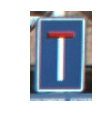

shape: (100, 68, 3), min: 17, max: 255


In [66]:
# Determine the (random) indexes of the images
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images and add shape, min and max values
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images[traffic_signs[i]].shape, 
                                                  images[traffic_signs[i]].min(), 
                                                  images[traffic_signs[i]].max()))

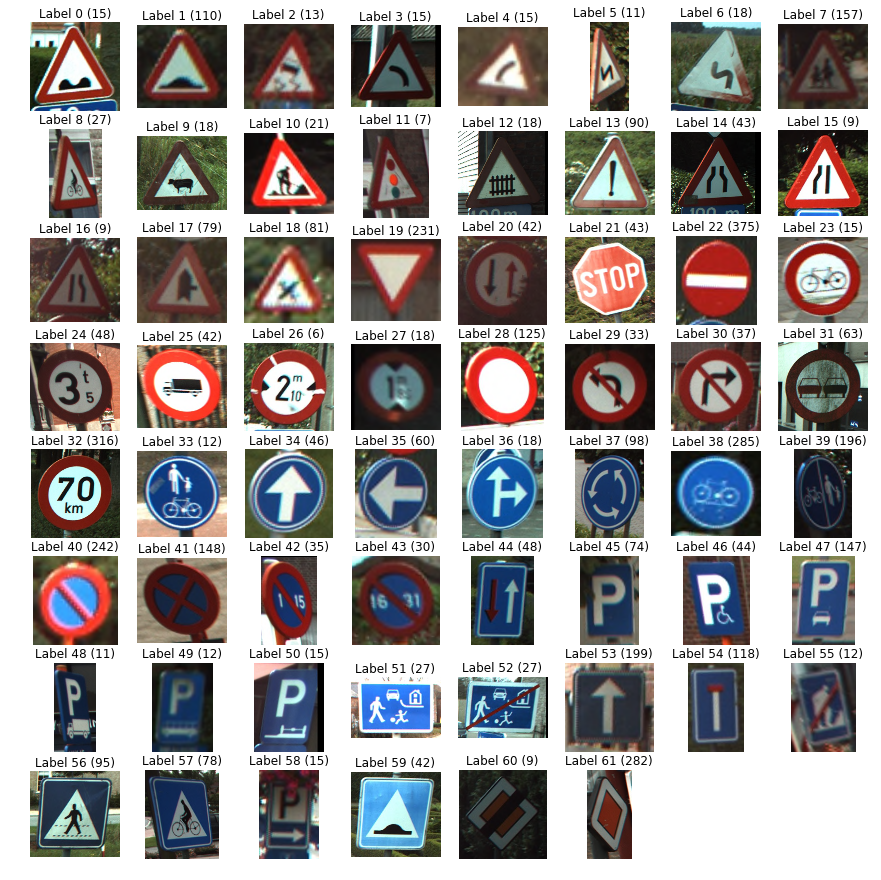

In [67]:
# Get the unique labels 
unique_labels = set(labels)

# Initialize the figure
plt.figure(figsize=(15, 15))

# Set a counter
i = 1

# For each unique label,
for label in unique_labels:
    # You pick the first image for each label
    image = images[labels.index(label)]
    # Define 64 subplots 
    plt.subplot(8, 8, i)
    # Don't include axes
    plt.axis('off')
    # Add a title to each subplot 
    plt.title("Label {0} ({1})".format(label, labels.count(label)))
    # Add 1 to the counter
    i += 1
    # And you plot this first image 
    plt.imshow(image)
    
# Show the plot
plt.show()

# Feature Extraction

In [68]:
# Resize images
images32 = [transform.resize(image, (28, 28)) for image in images]
images32 = np.array(images32)

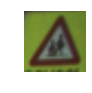

shape: (28, 28, 3), min: 0.0617647058824, max: 0.616176470588


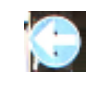

shape: (28, 28, 3), min: 0.0763405362145, max: 1.0


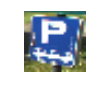

shape: (28, 28, 3), min: 0.0846476090436, max: 1.0


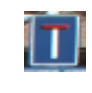

shape: (28, 28, 3), min: 0.0890756302521, max: 1.0


In [69]:
# Determine the (random) indexes of the images
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images and add shape, min and max values
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images32[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images32[traffic_signs[i]].shape, 
                                                  images32[traffic_signs[i]].min(), 
                                                  images32[traffic_signs[i]].max()))

# Convert images to Greyscale

In [70]:
images32 = rgb2gray(np.array(images32))

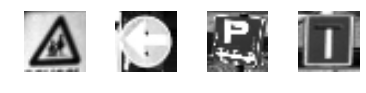

(4575, 28, 28)


In [71]:
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images32[traffic_signs[i]], cmap="gray")
    plt.subplots_adjust(wspace=0.5)
    
plt.show()

print(images32.shape)

# Deep Learning with TensorFlow

In [72]:
#Modeling the neural network
x = tf.placeholder(dtype = tf.float32, shape = [None, 28, 28])
y = tf.placeholder(dtype = tf.int32, shape = [None])
images_flat = tf.contrib.layers.flatten(x)
logits = tf.layers.dense(images_flat, 62, tf.nn.relu)
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits))
train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)
correct_pred = tf.argmax(logits, 1)
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

print("images_flat: ", images_flat)
print("logits: ", logits)
print("loss: ", loss)
print("predicted_labels: ", correct_pred)

('images_flat: ', <tf.Tensor 'Flatten_4/flatten/Reshape:0' shape=(?, 784) dtype=float32>)
('logits: ', <tf.Tensor 'dense_8/Relu:0' shape=(?, 62) dtype=float32>)
('loss: ', <tf.Tensor 'Mean_8:0' shape=() dtype=float32>)
('predicted_labels: ', <tf.Tensor 'ArgMax_4:0' shape=(?,) dtype=int64>)


In [73]:
#Running the neural network
sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(201):
        print('EPOCH', i)
        _, accuracy_val = sess.run([train_op, accuracy], feed_dict={x: images32, y: labels})
        if i % 10 == 0:
            print("Loss: ", loss)
        print('DONE WITH EPOCH')

('EPOCH', 0)
('Loss: ', <tf.Tensor 'Mean_8:0' shape=() dtype=float32>)
DONE WITH EPOCH
('EPOCH', 1)
DONE WITH EPOCH
('EPOCH', 2)
DONE WITH EPOCH
('EPOCH', 3)
DONE WITH EPOCH
('EPOCH', 4)
DONE WITH EPOCH
('EPOCH', 5)
DONE WITH EPOCH
('EPOCH', 6)
DONE WITH EPOCH
('EPOCH', 7)
DONE WITH EPOCH
('EPOCH', 8)
DONE WITH EPOCH
('EPOCH', 9)
DONE WITH EPOCH
('EPOCH', 10)
('Loss: ', <tf.Tensor 'Mean_8:0' shape=() dtype=float32>)
DONE WITH EPOCH
('EPOCH', 11)
DONE WITH EPOCH
('EPOCH', 12)
DONE WITH EPOCH
('EPOCH', 13)
DONE WITH EPOCH
('EPOCH', 14)
DONE WITH EPOCH
('EPOCH', 15)
DONE WITH EPOCH
('EPOCH', 16)
DONE WITH EPOCH
('EPOCH', 17)
DONE WITH EPOCH
('EPOCH', 18)
DONE WITH EPOCH
('EPOCH', 19)
DONE WITH EPOCH
('EPOCH', 20)
('Loss: ', <tf.Tensor 'Mean_8:0' shape=() dtype=float32>)
DONE WITH EPOCH
('EPOCH', 21)
DONE WITH EPOCH
('EPOCH', 22)
DONE WITH EPOCH
('EPOCH', 23)
DONE WITH EPOCH
('EPOCH', 24)
DONE WITH EPOCH
('EPOCH', 25)
DONE WITH EPOCH
('EPOCH', 26)
DONE WITH EPOCH
('EPOCH', 27)
DONE WITH EP

# Evaluation of the Neural Network

In [74]:
# Pick 10 random images
sample_indexes = random.sample(range(len(images32)), 10)
sample_images = [images32[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

# Run the "predicted_labels" op.
predicted = sess.run([correct_pred], feed_dict={x: sample_images})[0]
                        
# Print the real and predicted labels
print(sample_labels)
print(predicted)

[54, 61, 47, 22, 38, 14, 40, 47, 58, 61]
[54 40 47 22 38 18 40 47 39 32]


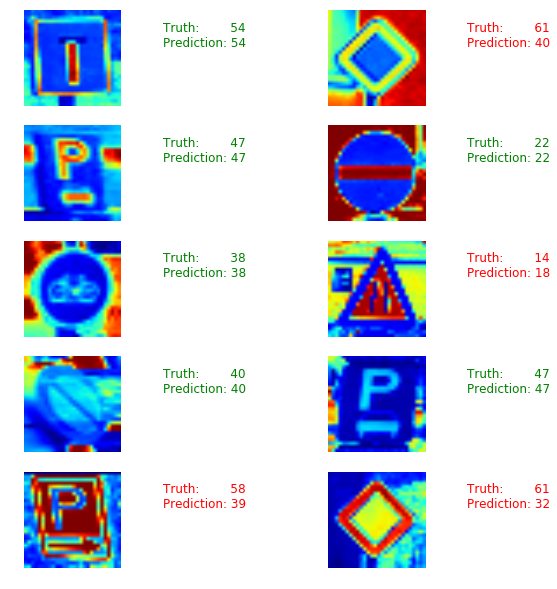

In [75]:
# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(sample_images[i])

In [76]:
from __future__ import division
# Load the test data
test_images, test_labels = load_data(test_data_dir)

# Transform the images to 28 by 28 pixels
test_images28 = [transform.resize(image, (28, 28)) for image in test_images]

# Convert to grayscale
from skimage.color import rgb2gray
test_images28 = rgb2gray(np.array(test_images28))

# Run predictions against the full test set.
predicted = sess.run([correct_pred], feed_dict={x: test_images28})[0]

# Calculate correct matches 
match_count = sum([int(y == y_) for y, y_ in zip(test_labels, predicted)])

# Calculate the accuracy
accuracy = match_count / (len(test_labels))

# Print the accuracy
print("Accuracy: {:.3f}".format(accuracy))

Accuracy: 0.625


The accuracy of the trained model is about 63%. Considering there is 62 different classes for the trained model and that there are no hidden layers added to the network; this is pretty good. We are not aware if the dataset is pairwise linearly sepereable- meaning any two classes can be seperated by a linear regression; therefore I am unsure if adding another layer will or will not improve the accuracy.

# Add another layer of 256 nodes to see if accuracy improves

In [83]:
#Modeling the neural network with another 256 nodes
x1 = tf.placeholder(dtype = tf.float32, shape = [None, 28, 28])
y1 = tf.placeholder(dtype = tf.int32, shape = [None])
images_flat1 = tf.contrib.layers.flatten(x1)


hiddenlayer1=tf.layers.dense(images_flat1, units=256, activation=tf.nn.relu)
logits1 = tf.layers.dense(hiddenlayer1, 62, tf.nn.relu)

loss1 = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y1, logits = logits1))
train_op1 = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss1)
correct_pred1 = tf.argmax(logits1, 1)
accuracy1 = tf.reduce_mean(tf.cast(correct_pred1, tf.float32))

print("images_flat: ", images_flat1)
print("logits: ", logits1)
print("loss: ", loss1)
print("predicted_labels: ", correct_pred1)

('images_flat: ', <tf.Tensor 'Flatten_6/flatten/Reshape:0' shape=(?, 784) dtype=float32>)
('logits: ', <tf.Tensor 'dense_12/Relu:0' shape=(?, 62) dtype=float32>)
('loss: ', <tf.Tensor 'Mean_12:0' shape=() dtype=float32>)
('predicted_labels: ', <tf.Tensor 'ArgMax_6:0' shape=(?,) dtype=int64>)


In [84]:
#Running the neural network with new model 1
sess1 = tf.Session()

sess1.run(tf.global_variables_initializer())

for i in range(201):
        print('EPOCH', i)
        _, accuracy_val = sess1.run([train_op1, accuracy1], feed_dict={x1: images32, y1: labels})
        if i % 10 == 0:
            print("Loss: ", loss1)
        print('DONE WITH EPOCH')

('EPOCH', 0)
('Loss: ', <tf.Tensor 'Mean_12:0' shape=() dtype=float32>)
DONE WITH EPOCH
('EPOCH', 1)
DONE WITH EPOCH
('EPOCH', 2)
DONE WITH EPOCH
('EPOCH', 3)
DONE WITH EPOCH
('EPOCH', 4)
DONE WITH EPOCH
('EPOCH', 5)
DONE WITH EPOCH
('EPOCH', 6)
DONE WITH EPOCH
('EPOCH', 7)
DONE WITH EPOCH
('EPOCH', 8)
DONE WITH EPOCH
('EPOCH', 9)
DONE WITH EPOCH
('EPOCH', 10)
('Loss: ', <tf.Tensor 'Mean_12:0' shape=() dtype=float32>)
DONE WITH EPOCH
('EPOCH', 11)
DONE WITH EPOCH
('EPOCH', 12)
DONE WITH EPOCH
('EPOCH', 13)
DONE WITH EPOCH
('EPOCH', 14)
DONE WITH EPOCH
('EPOCH', 15)
DONE WITH EPOCH
('EPOCH', 16)
DONE WITH EPOCH
('EPOCH', 17)
DONE WITH EPOCH
('EPOCH', 18)
DONE WITH EPOCH
('EPOCH', 19)
DONE WITH EPOCH
('EPOCH', 20)
('Loss: ', <tf.Tensor 'Mean_12:0' shape=() dtype=float32>)
DONE WITH EPOCH
('EPOCH', 21)
DONE WITH EPOCH
('EPOCH', 22)
DONE WITH EPOCH
('EPOCH', 23)
DONE WITH EPOCH
('EPOCH', 24)
DONE WITH EPOCH
('EPOCH', 25)
DONE WITH EPOCH
('EPOCH', 26)
DONE WITH EPOCH
('EPOCH', 27)
DONE WITH

In [85]:
# Pick 10 random images
sample_indexes = random.sample(range(len(images32)), 10)
sample_images = [images32[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

# Run the "predicted_labels" op.
predicted = sess1.run([correct_pred1], feed_dict={x1: sample_images})[0]
                        
# Print the real and predicted labels
print(sample_labels)
print(predicted)

[32, 39, 38, 38, 19, 14, 3, 30, 19, 13]
[32 38 38 38 19 57 28 30 19 13]


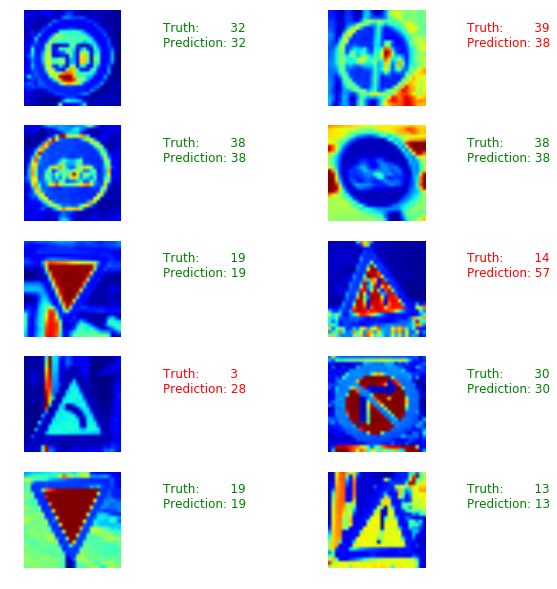

In [86]:
# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(sample_images[i])

In [87]:
# Load the test data
test_images, test_labels = load_data(test_data_dir)

# Transform the images to 28 by 28 pixels
test_images28 = [transform.resize(image, (28, 28)) for image in test_images]

# Convert to grayscale
from skimage.color import rgb2gray
test_images28 = rgb2gray(np.array(test_images28))

# Run predictions against the full test set.
predicted = sess1.run([correct_pred1], feed_dict={x1: test_images28})[0]

# Calculate correct matches 
match_count = sum([int(y1 == y1_) for y1, y1_ in zip(test_labels, predicted)])

# Calculate the accuracy
accuracy = match_count / (len(test_labels))

# Print the accuracy
print("Accuracy: {:.3f}".format(accuracy))

Accuracy: 0.705


The accuracy improves to 70% if we add one hidden layer in between the input dataset and the output. Adding one more layer essentially lets the model add room for pair-wise non-linear seperability. Therefore, since the accuracy of our model improves by adding more wiggle room into the neural network; we can safely say that all of the pairwise class sets were not linearly seperable (one could safely assume this before anyways, since we have many classes). To see how complicated our dataset really is, lets add one more hidden layer with another 256 nodes.

# Add one more layer with another 256 nodes

In [34]:
#Modeling the neural network with another 256 nodes
x1 = tf.placeholder(dtype = tf.float32, shape = [None, 28, 28])
y1 = tf.placeholder(dtype = tf.int32, shape = [None])
images_flat1 = tf.contrib.layers.flatten(x1)


hiddenlayer1=tf.layers.dense(images_flat1, units=256, activation=tf.nn.relu)
hiddenlayer2=tf.layers.dense(hiddenlayer1, 256, tf.nn.relu)
logits1 = tf.layers.dense(hiddenlayer2, 62, tf.nn.relu)

loss1 = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y1, logits = logits1))
train_op1 = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss1)
correct_pred1 = tf.argmax(logits1, 1)
accuracy1 = tf.reduce_mean(tf.cast(correct_pred1, tf.float32))

print("images_flat: ", images_flat1)
print("logits: ", logits1)
print("loss: ", loss1)
print("predicted_labels: ", correct_pred1)

('images_flat: ', <tf.Tensor 'Flatten_3/flatten/Reshape:0' shape=(?, 784) dtype=float32>)
('logits: ', <tf.Tensor 'dense_7/Relu:0' shape=(?, 62) dtype=float32>)
('loss: ', <tf.Tensor 'Mean_6:0' shape=() dtype=float32>)
('predicted_labels: ', <tf.Tensor 'ArgMax_3:0' shape=(?,) dtype=int64>)


In [36]:
#Running the neural network with new model 2
sess2 = tf.Session()

sess2.run(tf.global_variables_initializer())

for i in range(201):
        print('EPOCH', i)
        _, accuracy_val = sess2.run([train_op1, accuracy1], feed_dict={x1: images32, y1: labels})
        if i % 10 == 0:
            print("Loss: ", loss1)
        print('DONE WITH EPOCH')

('EPOCH', 0)
('Loss: ', <tf.Tensor 'Mean_6:0' shape=() dtype=float32>)
DONE WITH EPOCH
('EPOCH', 1)
DONE WITH EPOCH
('EPOCH', 2)
DONE WITH EPOCH
('EPOCH', 3)
DONE WITH EPOCH
('EPOCH', 4)
DONE WITH EPOCH
('EPOCH', 5)
DONE WITH EPOCH
('EPOCH', 6)
DONE WITH EPOCH
('EPOCH', 7)
DONE WITH EPOCH
('EPOCH', 8)
DONE WITH EPOCH
('EPOCH', 9)
DONE WITH EPOCH
('EPOCH', 10)
('Loss: ', <tf.Tensor 'Mean_6:0' shape=() dtype=float32>)
DONE WITH EPOCH
('EPOCH', 11)
DONE WITH EPOCH
('EPOCH', 12)
DONE WITH EPOCH
('EPOCH', 13)
DONE WITH EPOCH
('EPOCH', 14)
DONE WITH EPOCH
('EPOCH', 15)
DONE WITH EPOCH
('EPOCH', 16)
DONE WITH EPOCH
('EPOCH', 17)
DONE WITH EPOCH
('EPOCH', 18)
DONE WITH EPOCH
('EPOCH', 19)
DONE WITH EPOCH
('EPOCH', 20)
('Loss: ', <tf.Tensor 'Mean_6:0' shape=() dtype=float32>)
DONE WITH EPOCH
('EPOCH', 21)
DONE WITH EPOCH
('EPOCH', 22)
DONE WITH EPOCH
('EPOCH', 23)
DONE WITH EPOCH
('EPOCH', 24)
DONE WITH EPOCH
('EPOCH', 25)
DONE WITH EPOCH
('EPOCH', 26)
DONE WITH EPOCH
('EPOCH', 27)
DONE WITH EP

In [37]:
# Pick 10 random images
sample_indexes = random.sample(range(len(images32)), 10)
sample_images = [images32[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

# Run the "predicted_labels" op.
predicted = sess2.run([correct_pred1], feed_dict={x1: sample_images})[0]
                        
# Print the real and predicted labels
print(sample_labels)
print(predicted)

[61, 41, 39, 56, 10, 12, 22, 25, 61, 13]
[61 41 40  0 14 12 38 25 61 13]


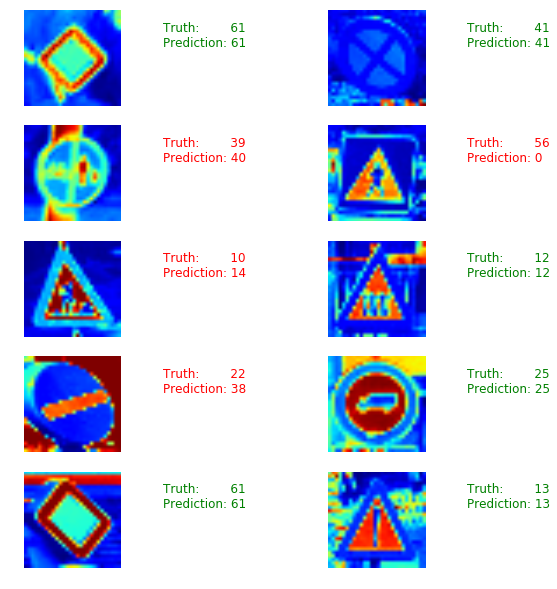

In [38]:
# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(sample_images[i])

In [39]:
# Load the test data
test_images, test_labels = load_data(test_data_dir)

# Transform the images to 28 by 28 pixels
test_images28 = [transform.resize(image, (28, 28)) for image in test_images]

# Convert to grayscale
from skimage.color import rgb2gray
test_images28 = rgb2gray(np.array(test_images28))

# Run predictions against the full test set.
predicted = sess2.run([correct_pred1], feed_dict={x1: test_images28})[0]

# Calculate correct matches 
match_count = sum([int(y1 == y1_) for y1, y1_ in zip(test_labels, predicted)])

# Calculate the accuracy
accuracy = match_count / (len(test_labels))

# Print the accuracy
print("Accuracy: {:.3f}".format(accuracy))

Accuracy: 0.568


As you can see the accuracy of our dataset went down to 59%, which is lower than our original trained model. Adding more and more hidden layers does not guarantee a more accurate trained model. Most datasets can be trained to a higher accuracy by using only one hidden layer. Also a key thing to note is that adding more hidden layers is very computationally expensive. Therefore, adding only one hidden layer to this dataset is the right call. In order to improve the accuracy higher than the 70%, we can adjust the number of nodes in the layer. There are many different formulas online that claim to optimize this; although I have not tested any. 